# Homework 3

For this assignment, you will be developing an artificial neural network to classify data given in the __[Dry Beans Data Set](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#)__. This data set was obtained as a part of a research study by Selcuk University, Turkey, in which a computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features. More details on the study can be found in the following __[research paper](https://www.sciencedirect.com/science/article/pii/S0168169919311573)__.

## About the Data Set
Seven different types of dry beans were used in a study in Selcuk University, Turkey, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features - 12 dimensions and 4 shape forms - were obtained from the grains.

Number of Instances (records in the data set): __13611__

Number of Attributes (fields within each record, including the class): __17__

### Data Set Attribute Information:

1. __Area (A)__ : The area of a bean zone and the number of pixels within its boundaries.
2. __Perimeter (P)__ : Bean circumference is defined as the length of its border.
3. __Major axis length (L)__ : The distance between the ends of the longest line that can be drawn from a bean.
4. __Minor axis length (l)__ : The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. __Aspect ratio (K)__ : Defines the relationship between L and l.
6. __Eccentricity (Ec)__ : Eccentricity of the ellipse having the same moments as the region.
7. __Convex area (C)__ : Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. __Equivalent diameter (Ed)__ : The diameter of a circle having the same area as a bean seed area.
9. __Extent (Ex)__ : The ratio of the pixels in the bounding box to the bean area.
10. __Solidity (S)__ : Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. __Roundness (R)__ : Calculated with the following formula: (4piA)/(P^2)
12. __Compactness (CO)__ : Measures the roundness of an object: Ed/L
13. __ShapeFactor1 (SF1)__
14. __ShapeFactor2 (SF2)__
15. __ShapeFactor3 (SF3)__
16. __ShapeFactor4 (SF4)__

17. __Classes : *Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira*__

### Libraries that can be used :
- NumPy, SciPy, Pandas, Sci-Kit Learn, TensorFlow, Keras, seaborn, plotly, matplotlib
- Any other library used during the lectures and discussion sessions.

### Other Notes
- Discussion materials should be helpful for doing the assignments.
- The homework submission should be a .ipynb file.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Exercise 1 - General Data Preprocessing (10 points)
Follow what's have done in hw2 exercise1 and preporcess the data for this homework.
- As the classes are categorical, use one-hot encoding to represent the set of classes. You will find this useful when developing the output layer of the neural network.
- Normalize each field of the input data using the min-max normalization technique.


In [2]:
# Load the dataset
dataset = pd.read_csv("Dry_Beans_Dataset.csv")

# Basic info of dataset
print("Dataset :")
print(dataset.head())
print("Classes : ")
print(dataset['Class'].unique())

print("Dimensions of the dataset : ", dataset.shape)
print("Features of the dataset :")
print(dataset.describe(include = 'all'))

X = dataset.drop('Class', axis = 1)
y = dataset['Class']

# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Class': set_of_classes})
y = pd.get_dummies(y)

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Dataset :
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  44830    814.955       320.731947       178.405838      1.797766   
1  33476    691.826       258.837971       165.220760      1.566619   
2  27057    606.138       227.460904       151.860320      1.497830   
3  49483    844.283       326.602913       194.689529      1.677558   
4  22461    544.584       192.801303       148.541136      1.297966   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.831018       45297     238.912806  0.658877  0.989690   0.848226   
1      0.769773       33907     206.453305  0.721155  0.987289   0.878921   
2      0.744491       27358     185.607226  0.801831  0.988998   0.925436   
3      0.802907       50289     251.005403  0.680179  0.983973   0.872348   
4      0.637517       22699     169.110122  0.774731  0.989515   0.951720   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.744899      0.0071

## Exercise 2 - Neural Network and Gradient (20 points)
Suppose there is a neural network with a 2-3-2-1 structure. The nodes in the first hidden layer(from left to right) use a linear activation function while the second hidden layer neurons and the output neuron use a sigmoid activation function. The output ŷ is the prediction of the network. 
h and y_hat are the values after applying the activation fuction. 

Loss is calculated by $L = \frac{1}{2} (y - ŷ)^2$.

After a Feed-Forward Pass, write the updated weights during backward pass for $w_{ko}$, $w_{jk}$, and $w_{ij}$ with a learning rate of ${\alpha}$. You have to show how you compute ${\Delta}w$ for each weight mathematically. 

Make sure that you show all your work. Refer to Lecture 09.

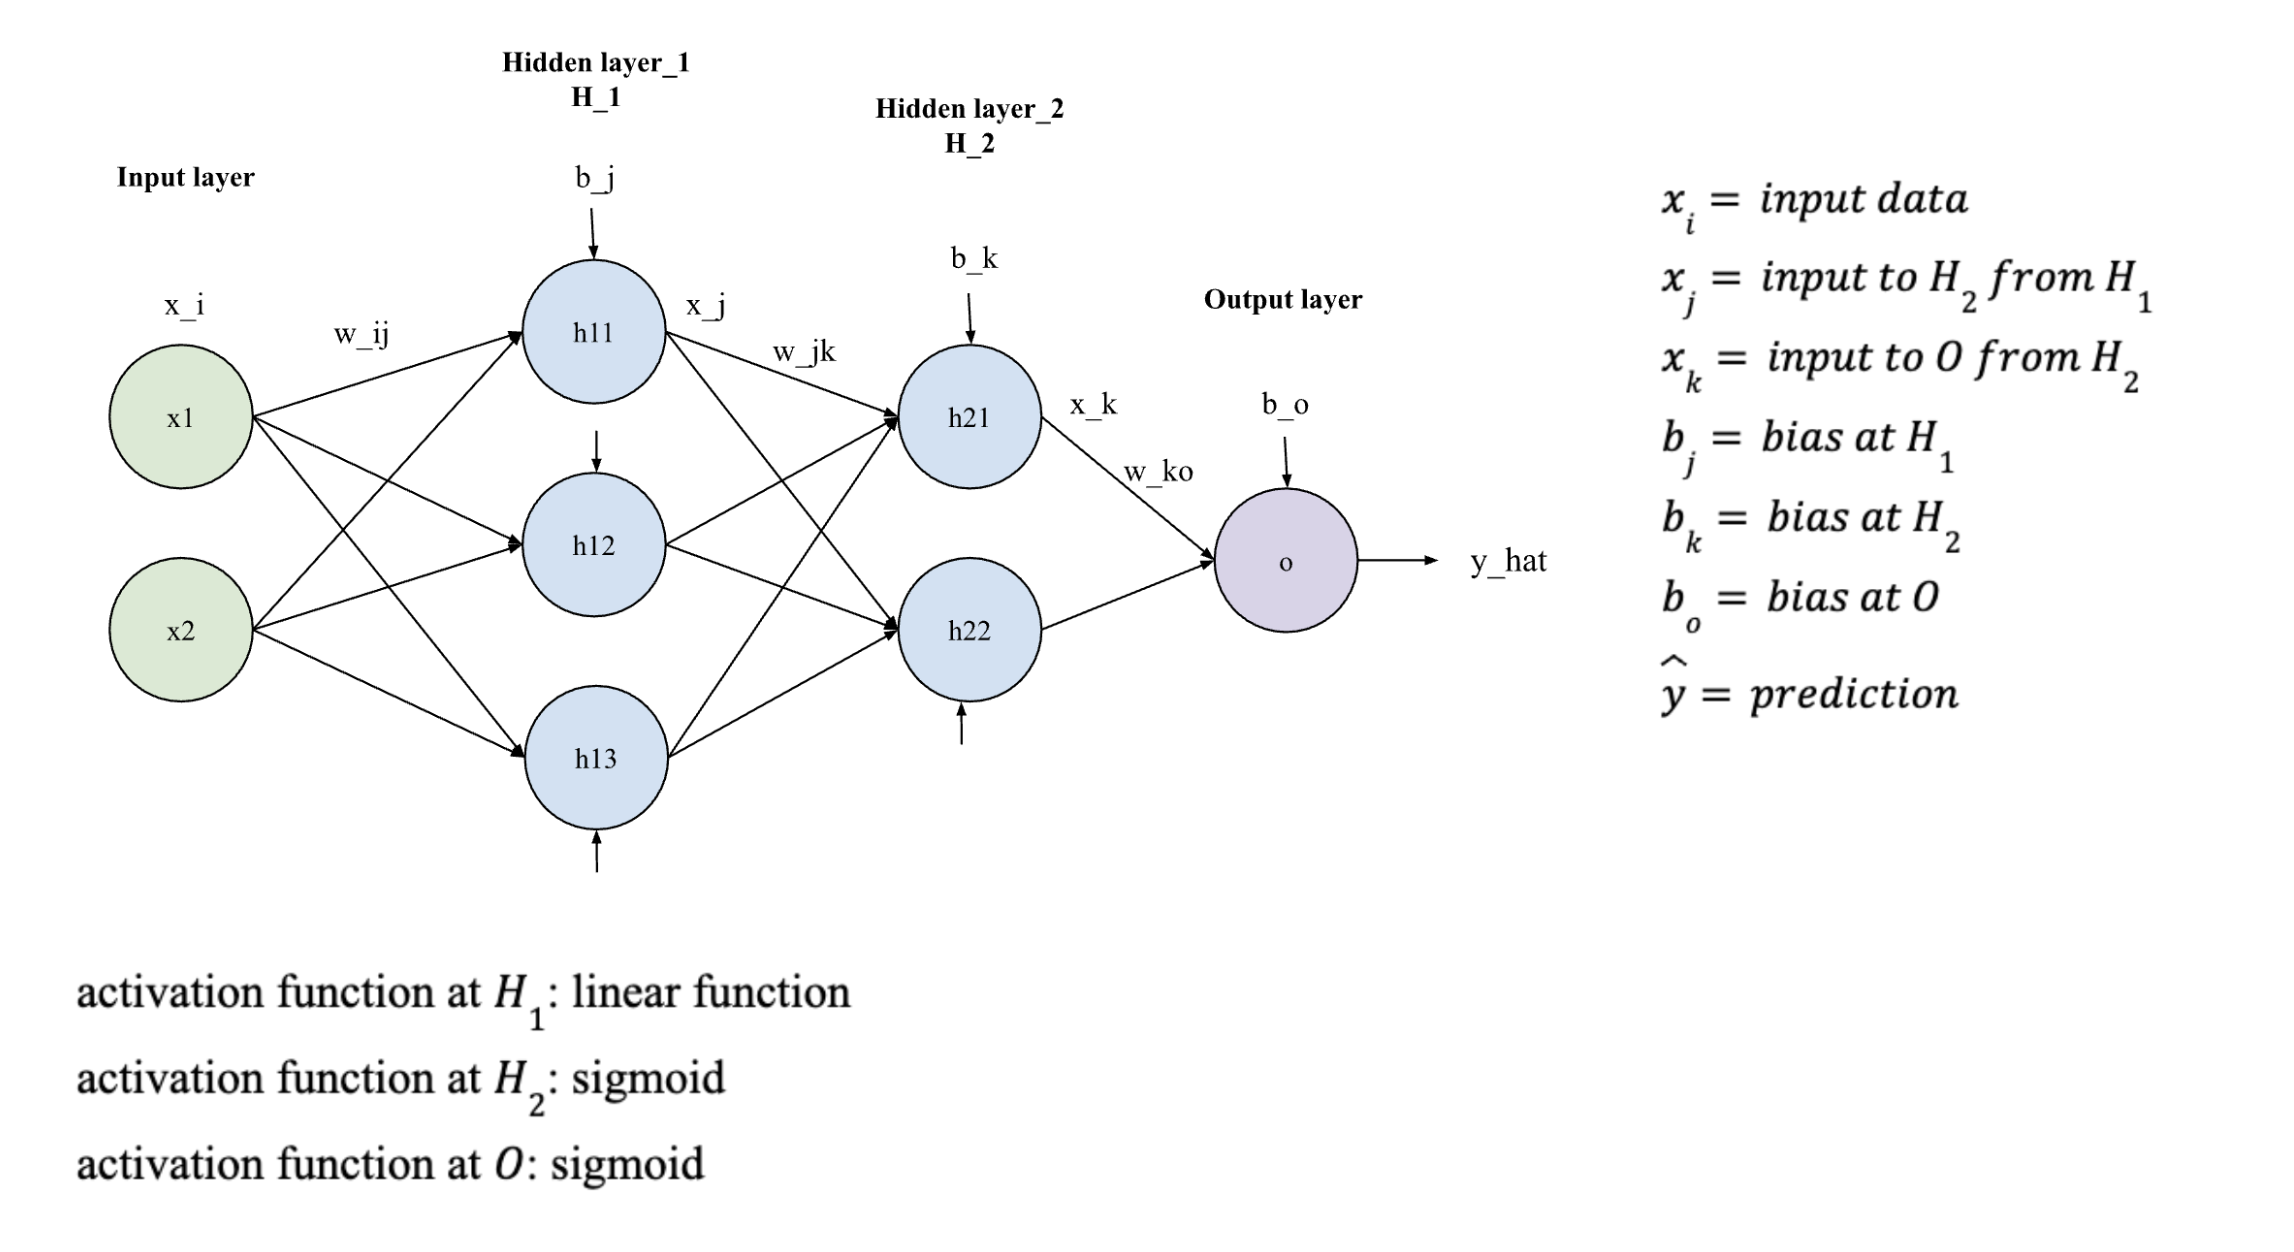

You may use the notations provided below.

$z_{j} = {\sum}w_{ij}x_{i} + b_{j}$; $x_{j} = z_{j}$

$z_{k} = {\sum}w_{jk}x_{j} + b_{x}$; $x_{k} = {\sigma}(z_{k})$

$z_{o} = {\sum}w_{ko}x_{k} + b_{o}$; $ŷ = {\sigma}(z_{o})$

Gradient of Loss with respect to W_k0 (Output Layer Weights):

Formula: delta L / delta W_k0 = -(y - y_hat) * sigma(h^2) * (1 - sigma(h^2)) * h^2
Explanation: This formula calculates the gradient of the loss function with respect to the weights (W_k0) from the hidden layer to the output layer.
Weight Update for W_k0:

Formula: Delta W_k0 = alpha * (y - y_hat) * sigma(h^2) * (1 - sigma(h^2)) * h^2
Explanation: This formula is used to update the weights W_k0 based on the calculated gradient.
Gradient of Loss with respect to W_jk (Hidden Layer Weights):

Formula: delta L / delta W_jk = -(y - y_hat) * sigma(h^2) * (1 - sigma(h^2)) * w_k0 * x
Explanation: This calculates the gradient of the loss function with respect to the weights (W_jk) from the input layer to the hidden layer.
Weight Update for W_jk:

Formula: Delta W_jk = alpha * (y - y_hat) * sigma(h^2) * (1 - sigma(h^2)) * w_k0 * x
Explanation: This is the formula for updating the weights W_jk.
Gradient of Loss with respect to W_ij (Input Layer Weights):

Formula: delta L / delta W_ij = -(y - y_hat) * sigma(h^2) * (1 - sigma(h^2)) * w_k0 * w_jk * sigma(x) * (1 - sigma(x))
Explanation: This formula calculates the gradient of the loss with respect to the weights (W_ij) from the previous layer to the input layer.
Weight Update for W_ij:

Formula: Delta W_ij = alpha * (y - y_hat) * sigma(h^2) * (1 - sigma(h^2)) * w_k0 * w_jk * sigma(x) * (1 - sigma(x))
Explanation: This formula updates the weights W_ij based on the calculated gradient.
Key:
delta L / delta W_ij: Gradient of loss with respect to weights.
y: True label.
y_hat: Predicted label.
sigma: Sigmoid function.
h^2: Output of the hidden layer.
w_k0, w_jk, w_ij: Weights.
x: Input to the network.
alpha: Learning rate.

## Exercise 3 : Building a Feed-Forward Neural Network(40 points in total)


### Training and Testing the Neural Network (40 points)

Design a 4-layer artificial neural network, specifically a feed-forward multi-layer perceptron (using the sigmoid activation function), to classify the type of 'Dry Bean' given the other attributes in the data set, similar to the one mentioned in the paper above. Please note that this is a multi-class classification problem so select the right number of nodes accordingly for the output layer.

For training and testing the model, split the data into training and testing set by __90:10__ and use the training set for training the model and the test set to evaluate the model performance.

Consider the following hyperparameters while developing your model :

- Number of nodes in each hidden layer should be (12, 3)
- Learning rate should be 0.3
- Number of epochs should be 500
- The sigmoid function should be used as the activation function in each layer
- Stochastic Gradient Descent should be used to minimize the error rate

__Requirements once the model has been trained :__

- A confusion matrix for all classes, specifying the true positive, true negative, false positive, and false negative cases for each category in the class
- The mean squared error (MSE) of the model

__Notes :__

- Splitting of the dataset should be done __after__ the data preprocessing step.
- The mean squared error (MSE) values obtained __should be positive__.

c:\Users\manyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


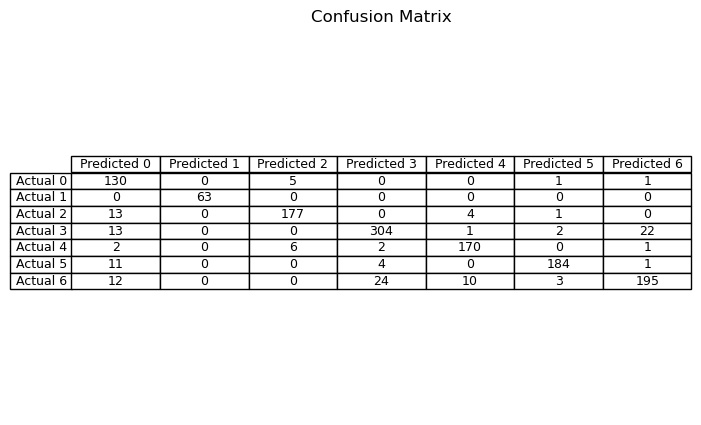

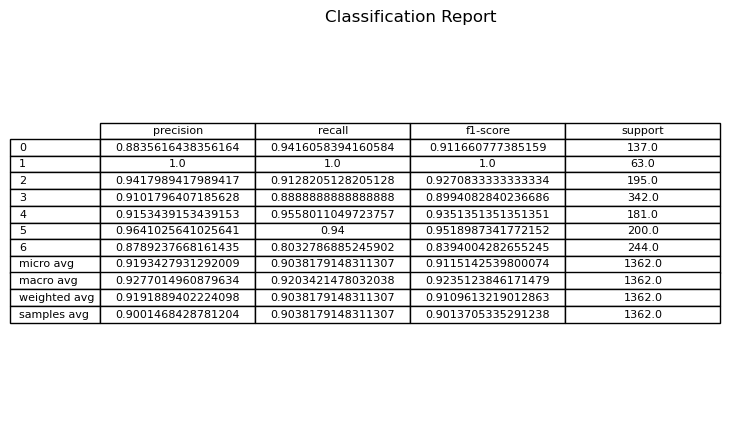

Mean Square Error :  0.0250681770505559


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

# Load the dataset and separate features and target
dataset = pd.read_csv('Dry_Beans_Dataset.csv')
X = dataset.drop('Class', axis=1)
y = LabelEncoder().fit_transform(dataset['Class'])

# Rescale features and split the dataset
scaler = MinMaxScaler((0, 1))
X_rescaled = scaler.fit_transform(X)
data_train, data_test, class_train, class_test = train_test_split(X_rescaled, pd.get_dummies(y), test_size=0.1, random_state=42)

# Initialize and train the MLPClassifier
mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic', learning_rate_init=0.3, batch_size=100, hidden_layer_sizes=(12, 3), max_iter=500)
mlp.fit(data_train, class_train)

# Predict and evaluate the model
pred = mlp.predict(data_test)
mse = mean_squared_error(class_test, pred)
conf_matrix = confusion_matrix(class_test.values.argmax(axis=1), pred.argmax(axis=1))
class_report = classification_report(class_test, pred, output_dict=True)

# Convert confusion matrix and classification report to DataFrame for better table structure
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'Actual {i}' for i in range(len(conf_matrix))], 
                              columns=[f'Predicted {i}' for i in range(len(conf_matrix))])

class_report_df = pd.DataFrame(class_report).transpose()

# Displaying the Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=conf_matrix_df.values, colLabels=conf_matrix_df.columns, rowLabels=conf_matrix_df.index, cellLoc='center', loc='center')
plt.title('Confusion Matrix')

plt.show()

# Displaying the Classification Report
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=class_report_df.values, colLabels=class_report_df.columns, rowLabels=class_report_df.index, cellLoc='center', loc='center')
plt.title('Classification Report')

plt.show()

# Display Mean Square Error
print("Mean Square Error : ", mse)


## Exercise 4 : k-fold Cross Validation (10 points in total)

In order to avoid using biased models, use 10-fold cross validation to generalize the model based on the given data set.

__Requirements :__
- The MSE values during each iteration of the cross validation
- The overall average MSE value

__Note :__ The mean squared error (MSE) values obtained should be positive.

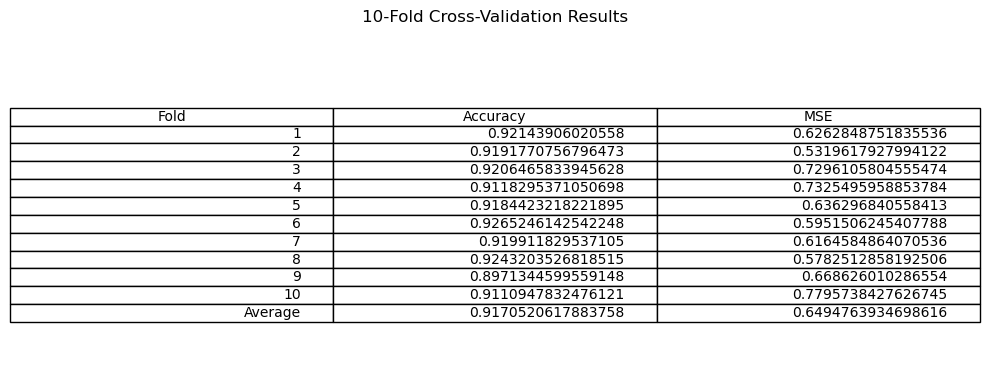

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the dataset and prepare features and target
dataset = pd.read_csv('Dry_Beans_Dataset.csv')
X = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset.drop('Class', axis=1))
y = LabelEncoder().fit_transform(dataset['Class'])

# Define the classifier and set up 10-fold cross-validation
mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic', learning_rate_init=0.4, batch_size=100, hidden_layer_sizes=(10, 2), max_iter=600)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and evaluate the model
results = []

for fold, (train_indices, test_indices) in enumerate(kf.split(X), 1):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    results.append([fold, accuracy_score(y_test, predictions), mean_squared_error(y_test, predictions)])

# Add average accuracy and MSE to the results
average_accuracy = sum([row[1] for row in results]) / kf.n_splits
average_mse = sum([row[2] for row in results]) / kf.n_splits
results.append(['Average', average_accuracy, average_mse])

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.set_title('10-Fold Cross-Validation Results', pad=20)

# Create the table
column_labels = ["Fold", "Accuracy", "MSE"]
table = ax.table(cellText=results, colLabels=column_labels, loc='center')

# Adjust layout to make room for the table
plt.tight_layout()

plt.show()


## Exercise 5 : Hyperparameter Tuning (20 points)

Use either grid search or random search methodology to find the optimal number of nodes required in each hidden layer, as well as the optimal learning rate and the number of epochs, such that the MSE of the model is minimum for the given Dry_Beans_Dataset.

__Requirements :__
- The set of optimal hyperparameters
- The mimimum MSE achieved using this set of optimal hyperparameters

__Note :__ Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, make_scorer

# Load the dataset
dataset = pd.read_csv('Dry_Beans_Dataset.csv')

# Features and target
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Encode the categorical variable 'Class'
y_encoded = pd.get_dummies(y)

# Rescale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)

# Hyperparameters to tune
max_iterations = [500, 800, 1000]
hidden_layer_sizes = [(10, 10), (15, 15), (20, 20)]
learning_rates = [0.01, 0.05, 0.1]

param_grid = {
    'max_iter': max_iterations,
    'hidden_layer_sizes': hidden_layer_sizes,
    'learning_rate_init': learning_rates,
}

# Set up the MLPClassifier
mlp = MLPClassifier(solver='adam', random_state=42)

# GridSearchCV for accuracy
grid_accuracy = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')
grid_accuracy.fit(X_rescaled, y_encoded)
optimal_accuracy = grid_accuracy.best_score_
optimal_params_acc = grid_accuracy.best_params_

# GridSearchCV for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_mse = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring=mse_scorer)
grid_mse.fit(X_rescaled, y_encoded)
minimum_mse = -grid_mse.best_score_
optimal_params_mse = grid_mse.best_params_

# Print results
print("Optimal Hyper-parameters for Accuracy: ", optimal_params_acc)
print("Optimal Accuracy: ", optimal_accuracy)
print("Optimal Hyper-parameters for MSE: ", optimal_params_mse)
print("Minimum MSE: ", minimum_mse)


Optimal Hyper-parameters for Accuracy:  {'hidden_layer_sizes': (15, 15), 'learning_rate_init': 0.01, 'max_iter': 500}
Optimal Accuracy:  0.905517021977586
Optimal Hyper-parameters for MSE:  {'hidden_layer_sizes': (15, 15), 'learning_rate_init': 0.01, 'max_iter': 500}
Minimum MSE:  0.022891219616235758
